In [1]:
# Import libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Import TensorFlow for building the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

Saving 63MOONS.BO.csv to 63MOONS.BO.csv
User uploaded file "63MOONS.BO.csv" with length 428401 bytes


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,124.250000,124.250000,124.250000,124.250000,90.421135,26400
1,2000-01-04,133.199997,134.149994,115.000000,134.149994,97.625725,56600
2,2000-01-05,123.449997,135.000000,123.449997,129.100006,93.950676,57600
3,2000-01-06,133.000000,139.399994,118.900002,119.800003,87.182724,29100
4,2000-01-07,110.250000,110.250000,110.250000,110.250000,80.232864,6100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4938 entries, 0 to 4937
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4938 non-null   object 
 1   Open       4938 non-null   float64
 2   High       4938 non-null   float64
 3   Low        4938 non-null   float64
 4   Close      4938 non-null   float64
 5   Adj Close  4938 non-null   float64
 6   Volume     4938 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 270.2+ KB


In [5]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [6]:
df = df.dropna()

In [7]:
# Convert the 'Date' column to datetime format for better manipulation
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, and Day from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop unnecessary columns like 'Date' and 'Adj Close'
df = df.drop(columns=['Date', 'Adj Close'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4938 entries, 0 to 4937
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4938 non-null   float64
 1   High    4938 non-null   float64
 2   Low     4938 non-null   float64
 3   Close   4938 non-null   float64
 4   Volume  4938 non-null   int64  
 5   Year    4938 non-null   int32  
 6   Month   4938 non-null   int32  
 7   Day     4938 non-null   int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 250.9 KB


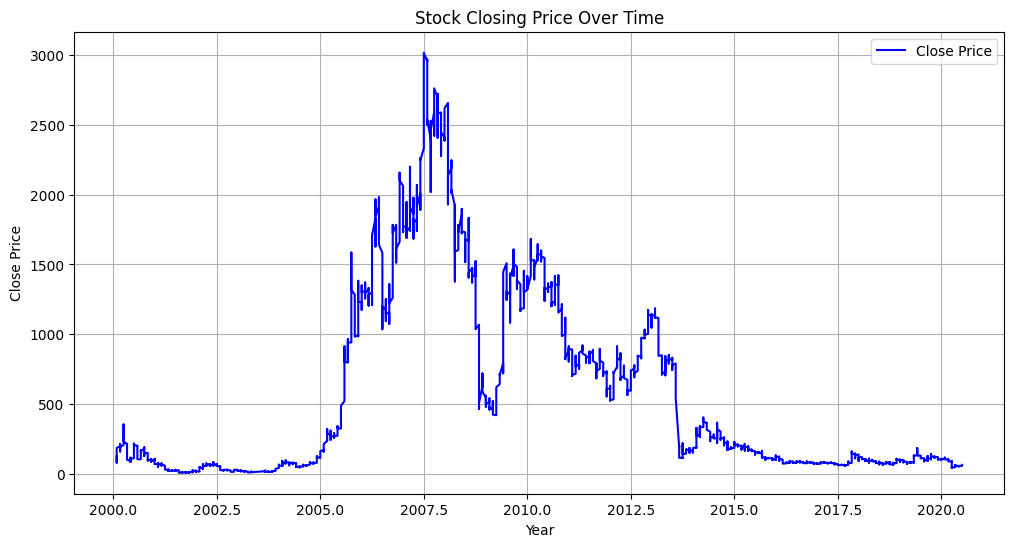

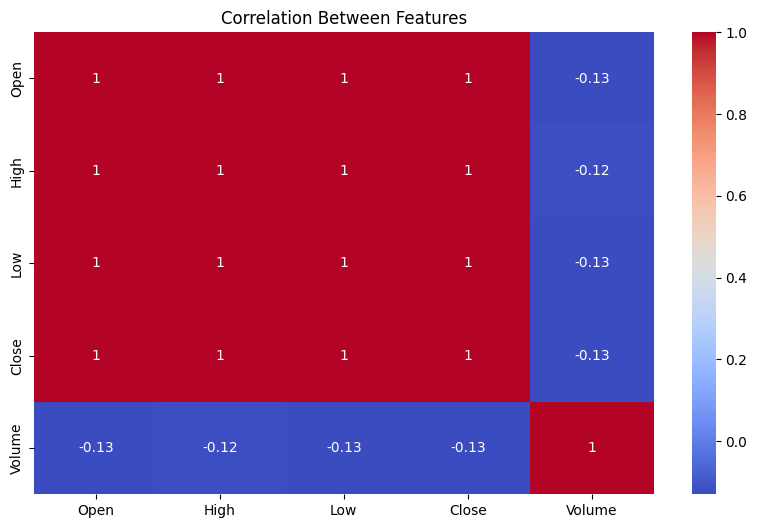

In [9]:
# Plot the stock price trend over time
plt.figure(figsize=(12,6))
plt.plot(df['Year'] + df['Month']/12, df['Close'], label='Close Price', color='blue')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot correlation heatmap between numerical columns
plt.figure(figsize=(10,6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

In [10]:
# Features (X) and target variable (y)
X = df[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']]
y = df['Close']

# Split the data into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature values using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression R2 Score: 0.9997565029425173
Linear Regression RMSE: 10.38241519811873


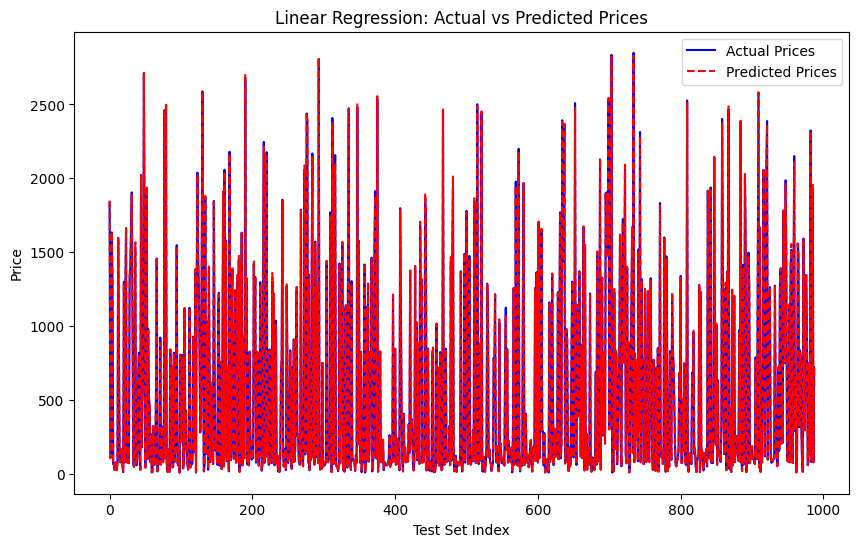

In [11]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model using R-squared score and RMSE
print('Linear Regression R2 Score:', r2_score(y_test, y_pred_lr))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Plot predicted vs actual values for Linear Regression
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred_lr, label='Predicted Prices', color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Test Set Index')
plt.ylabel('Price')
plt.legend()
plt.show()

Random Forest R2 Score: 0.9995666879397621
Random Forest RMSE: 13.850068528573132


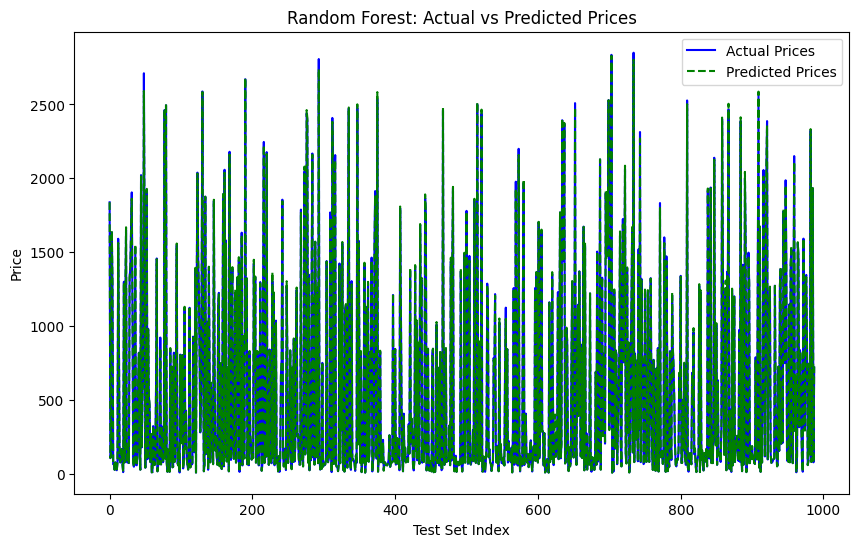

In [12]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model using R-squared score and RMSE
print('Random Forest R2 Score:', r2_score(y_test, y_pred_rf))
print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Plot predicted vs actual values for Random Forest
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred_rf, label='Predicted Prices', color='green', linestyle='--')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.xlabel('Test Set Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
# Reshape the data for LSTM: [samples, time steps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
lstm_model = Sequential()

# First LSTM layer with dropout
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))

# Dense layers for output
lstm_model.add(Dense(25))  # Dense layer with 25 units
lstm_model.add(Dense(1))   # Output layer

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

 # Train the LSTM model with more epochs and a smaller batch size
history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 797611.0000 - val_loss: 660132.7500
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 686829.8125 - val_loss: 527754.0625
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 553369.4375 - val_loss: 431542.4375
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 436643.7188 - val_loss: 273275.5312
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 274094.1250 - val_loss: 178695.4062
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 178184.1719 - val_loss: 119900.6797
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 129995.3359 - val_loss: 81454.6641
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 83268.8906 - val_loss: 56018.4648
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 57238.1328 - val_loss: 40422.0430
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 44473.1680 - val_loss: 29786.2734
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
LSTM R2 Score: 0.9984121685018091
LSTM RMSE: 26.512686730729015


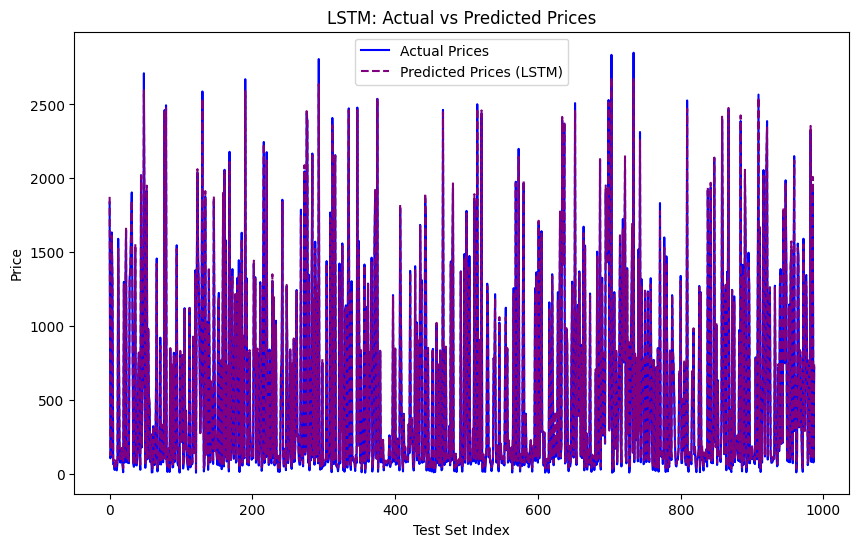

In [16]:
# Make predictions using LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluate the model's performance
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2_lstm = r2_score(y_test, y_pred_lstm)

print('LSTM R2 Score:', r2_lstm)
print('LSTM RMSE:', rmse_lstm)

# Plot predicted vs actual values for LSTM
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred_lstm, label='Predicted Prices (LSTM)', color='purple', linestyle='--')
plt.title('LSTM: Actual vs Predicted Prices')
plt.xlabel('Test Set Index')
plt.ylabel('Price')
plt.legend()
plt.show()

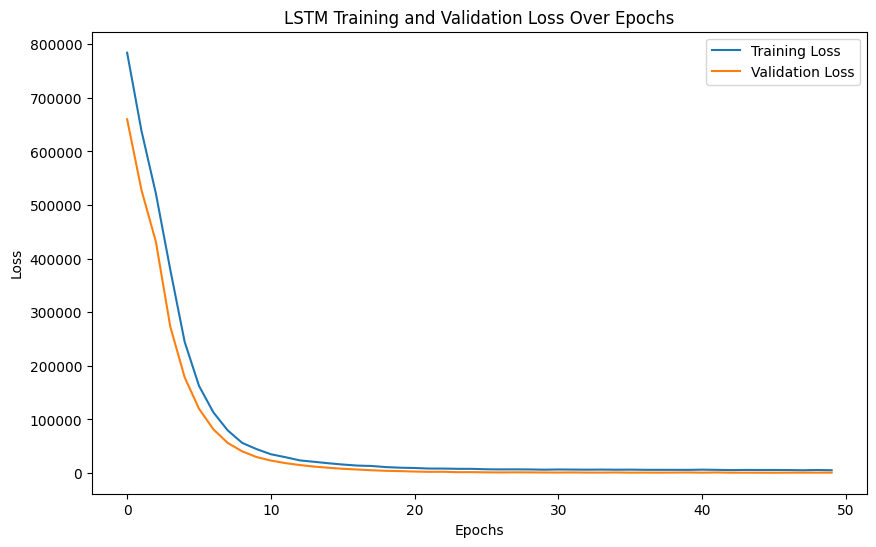

In [17]:
# Plot the loss over epochs
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Upload the unseen dataset
from google.colab import files
uploaded = files.upload()

import io
unseen_df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

Saving 500253.BO.csv to 500253.BO.csv


In [29]:
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4345 non-null   float64
 1   High    4345 non-null   float64
 2   Low     4345 non-null   float64
 3   Close   4345 non-null   float64
 4   Volume  4345 non-null   int64  
 5   Year    4345 non-null   int32  
 6   Month   4345 non-null   int32  
 7   Day     4345 non-null   int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 220.8 KB


In [33]:

# Features (X_unseen) from the unseen dataset
X_unseen = unseen_df[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']]

# Normalize the unseen data using the same scaler (trained on original dataset)
X_unseen_scaled = scaler.transform(X_unseen)

# Reshape the data for LSTM: [samples, time steps, features]
X_unseen_lstm = X_unseen_scaled.reshape((X_unseen_scaled.shape[0], 1, X_unseen_scaled.shape[1]))

# Make predictions using trained models on unseen data
# Predict using Linear Regression
y_pred_unseen_lr = lr_model.predict(X_unseen_scaled)

# Predict using Random Forest
y_pred_unseen_rf = rf_model.predict(X_unseen_scaled)

# Predict using LSTM
y_pred_unseen_lstm = lstm_model.predict(X_unseen_lstm)

# Ensure 'y_unseen' contains the actual target ('Close') from the unseen dataset
y_unseen = unseen_df['Close']

# Evaluate Linear Regression
print('Linear Regression (Unseen Data) R2 Score:', r2_score(y_unseen, y_pred_unseen_lr))
print('Linear Regression (Unseen Data) RMSE:', np.sqrt(mean_squared_error(y_unseen, y_pred_unseen_lr)))

# Evaluate Random Forest
print('Random Forest (Unseen Data) R2 Score:', r2_score(y_unseen, y_pred_unseen_rf))
print('Random Forest (Unseen Data) RMSE:', np.sqrt(mean_squared_error(y_unseen, y_pred_unseen_rf)))

# Evaluate LSTM
print('LSTM (Unseen Data) R2 Score:', r2_score(y_unseen, y_pred_unseen_lstm))
print('LSTM (Unseen Data) RMSE:', np.sqrt(mean_squared_error(y_unseen, y_pred_unseen_lstm)))

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Linear Regression (Unseen Data) R2 Score: 0.9998076273253509
Linear Regression (Unseen Data) RMSE: 2.6762145069286434
Random Forest (Unseen Data) R2 Score: 0.9996186843852677
Random Forest (Unseen Data) RMSE: 3.7678319445337554
LSTM (Unseen Data) R2 Score: 0.9859354572251133
LSTM (Unseen Data) RMSE: 22.88295139070806


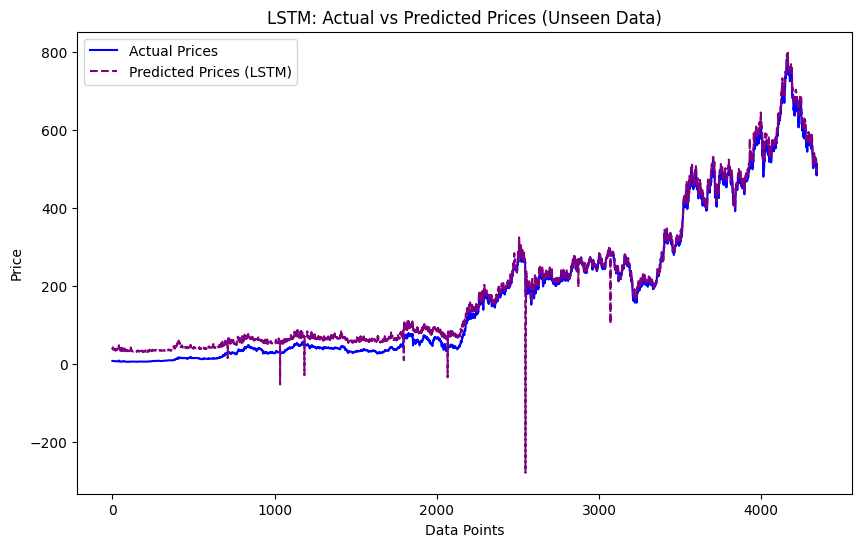

In [34]:
plt.figure(figsize=(10,6))
plt.plot(y_unseen.values, label='Actual Prices', color='blue')
plt.plot(y_pred_unseen_lstm, label='Predicted Prices (LSTM)', color='purple', linestyle='--')
plt.title('LSTM: Actual vs Predicted Prices (Unseen Data)')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.legend()
plt.show()